In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Data

In [72]:
df = pd.read_csv('insurance.csv')

In [73]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Problem Statement: In future, if we pass all the features like age, sex, bmi, children, smoker and region - our model should predict the charges.

### data cleaning

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [75]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [76]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Feature engineering

In [77]:
### converting sex into numeric value
Male = pd.get_dummies(df['sex'],drop_first=True)
df = pd.concat([df,Male],axis =1)

In [78]:
Male

,male
0,0
1,1
2,1
3,1
4,1
...,...
1333,1
1334,0
1335,0
1336,0


In [79]:
df.head()

,age,sex,bmi,children,smoker,region,charges,male
0,19,female,27.900,0,yes,southwest,16884.92400,0
1,18,male,33.770,1,no,southeast,1725.55230,1
2,28,male,33.000,3,no,southeast,4449.46200,1
3,33,male,22.705,0,no,northwest,21984.47061,1
4,32,male,28.880,0,no,northwest,3866.85520,1


In [80]:
### similary for smoker
Smoker = pd.get_dummies(df['smoker'],drop_first=True)
df = pd.concat([df,Smoker],axis = 1)
df.head()

,age,sex,bmi,children,smoker,region,charges,male,yes
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0


In [81]:
### rename yes
df = df.rename(columns = {'yes':'Smoker'})

In [82]:
df.head()

,age,sex,bmi,children,smoker,region,charges,male,Smoker
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0


In [83]:
### region
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

### Exploratory Analysis

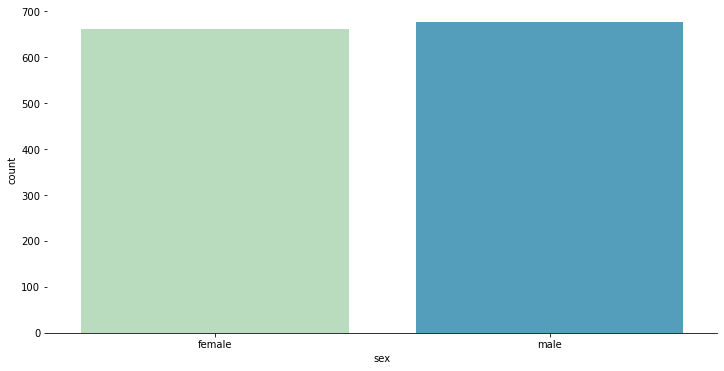

In [37]:
# distribution of gender
plt.figure(figsize=(12,6))
sns.countplot(x ='sex',data=df, palette = 'GnBu')
sns.despine(left = True)

In [38]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

##### relationship of smoking and Gender to Charges

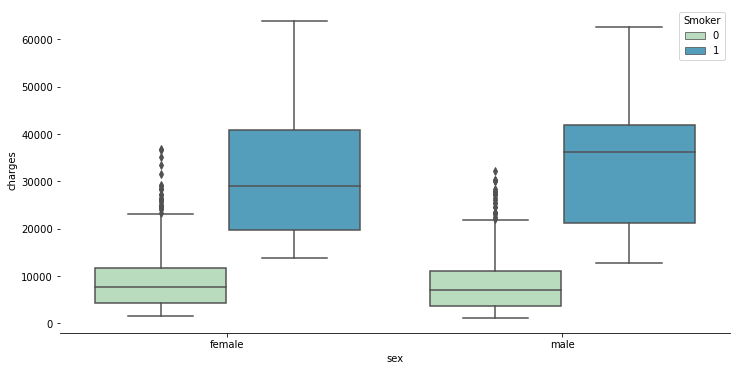

In [42]:
plt.figure(figsize=(12,6))
sns.boxplot(x = "sex", y= "charges", data = df, palette = 'GnBu', hue = 'Smoker')
sns.despine(left = True)

Hence we see that for smokers, charges are more in both genders.

Now for age

<AxesSubplot:xlabel='age', ylabel='charges'>

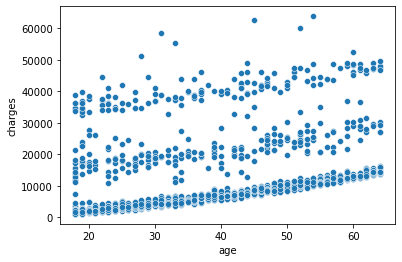

In [43]:
sns.scatterplot(x='age',y="charges",data=df)

We see that with age, charges are increasing but there is a lot of variation. Let's find out why.

<AxesSubplot:xlabel='age', ylabel='charges'>

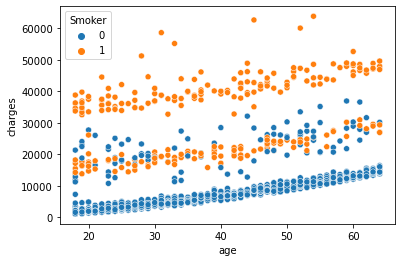

In [44]:
sns.scatterplot(x='age',y="charges",data=df, hue = "Smoker")

<AxesSubplot:xlabel='age', ylabel='charges'>

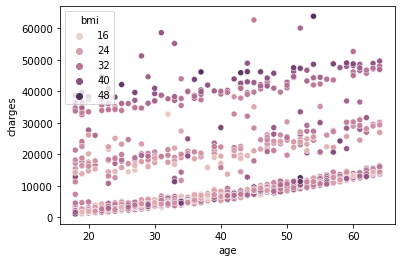

In [45]:
sns.scatterplot(x='age',y="charges",data=df, hue = "bmi")

<AxesSubplot:xlabel='age', ylabel='charges'>

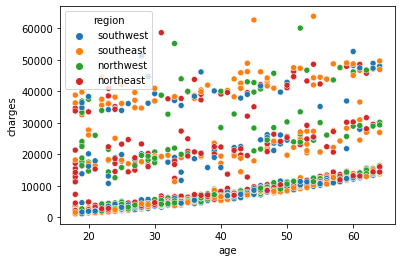

In [46]:
sns.scatterplot(x='age',y="charges",data=df, hue = "region")

Hence, smoking and bmi are contributing to higher charges but not region.

In [84]:
## Now, let's drop unnecessary cols

df.drop(["sex","smoker","region"],axis = 1, inplace=True)
df.head()

,age,bmi,children,charges,male,Smoker
0,19,27.900,0,16884.92400,0,1
1,18,33.770,1,1725.55230,1,0
2,28,33.000,3,4449.46200,1,0
3,33,22.705,0,21984.47061,1,0
4,32,28.880,0,3866.85520,1,0


<AxesSubplot:>

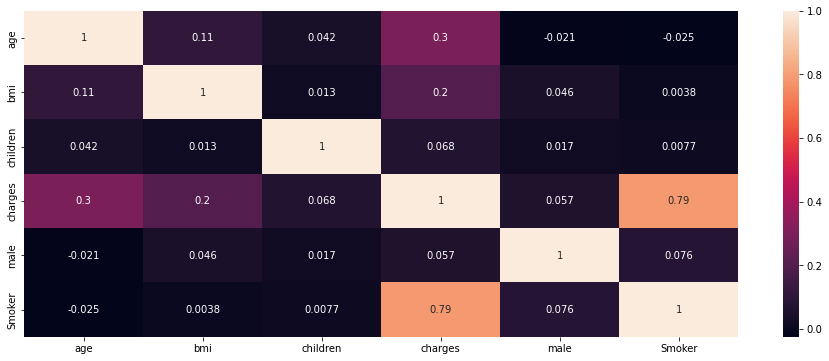

In [85]:
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(),annot=True)

### Splitting the data

In [86]:
x = df.drop('charges', axis = 1)
y = df['charges']

In [87]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4)

In [88]:
x_train.shape

(802, 5)

In [89]:
df.head()

,age,bmi,children,charges,male,Smoker
0,19,27.900,0,16884.92400,0,1
1,18,33.770,1,1725.55230,1,0
2,28,33.000,3,4449.46200,1,0
3,33,22.705,0,21984.47061,1,0
4,32,28.880,0,3866.85520,1,0


we scale our data next since different cols are having different range of values


### scaling the data

In [90]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [91]:
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)


In [92]:
scaled_x_train

array([[ 0.69975059,  1.12566251,  0.75058805,  0.98269338, -0.51282758],
       [-0.22738115, -1.35146297,  1.57295364, -1.01761142, -0.51282758],
       [-0.51265245, -2.0555305 ,  0.75058805, -1.01761142,  1.94997313],
       ...,
       [ 1.69820014,  0.27014795,  0.75058805, -1.01761142,  1.94997313],
       [ 1.41292884, -0.64739544, -0.89414314, -1.01761142, -0.51282758],
       [ 0.55711493, -1.11543118, -0.07177755, -1.01761142, -0.51282758]])

### Support Vector Regression

In [94]:
from sklearn.svm import SVR

regressor = SVR()
regressor.fit(scaled_x_train,y_train)

SVR()

In [95]:
predict = regressor.predict(scaled_x_test)

In [96]:
predict.shape

(536,)

In [97]:
y_test.shape

(536,)

In [98]:
predict[:10]

array([9688.18111851, 9640.28207402, 9603.09541427, 9683.36778458,
       9707.04495477, 9690.80709327, 9669.6829501 , 9711.20792875,
       9592.66199907, 9594.96515706])

In [99]:
y_test[:10]

561     10923.93320
820      7445.91800
139      2166.73200
72      11741.72600
738     36189.10170
859     10965.44600
279      9855.13140
558     39983.42595
822      1621.88270
1268     1880.48700
Name: charges, dtype: float64